<h2>Is this a good model? A bad one? Why?</h2>

In this package, I created the option to solve the Titanic problem using three different algorithms: Dummy Classifier, Random Forest, and Gradient Boosting. 
The process for each algorithm is the next:

1. Load the dataset using the DataLoader class
2. Do the feature engineering process over the dataset class FeatureEngineer (based on the EDA analysis see analysis [here](https://github.com/nestormauro/titanic/blob/main/notebooks/EDA.ipynb))
3. Calculate the mean roc auc and mean accuracy over the K-Fold cross-validation
  
The K-Fold cross-validation method is a robust estimator that guarantees a fair comparison between algorithms. Using K-Fold I get the average of au roc for each fold and the average accuracy for each fold.
Using mean au roc using K-Fold I can say with good certainty that the best algorithm to solve this problem is the Gradient Boost. The next is a screenshot of the ML-Flow tracking system showing the comparison:

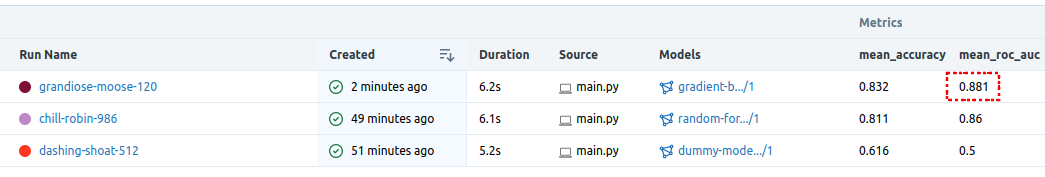

Is a good model because the mean au roc metric is near 0.88 with the default parameters. It is pretty probable that with the hyperparameters tuning can improve these results in future iterations.

<h2>All the features are equally important? What are the most useful ones? Why?</h2>

During the exploratory data analysis, I created three new features:

* Social status: feature to get categories based on name
* Family size: feature that with the number of relatives
* Is alone: (0 or 1) 1 if the number of relatives is equal to 1

After that, I filled missing values and then I got the correlation matrix. Using the correlation matrix I got a estimator about the feature importance, as you can see in the next graph:

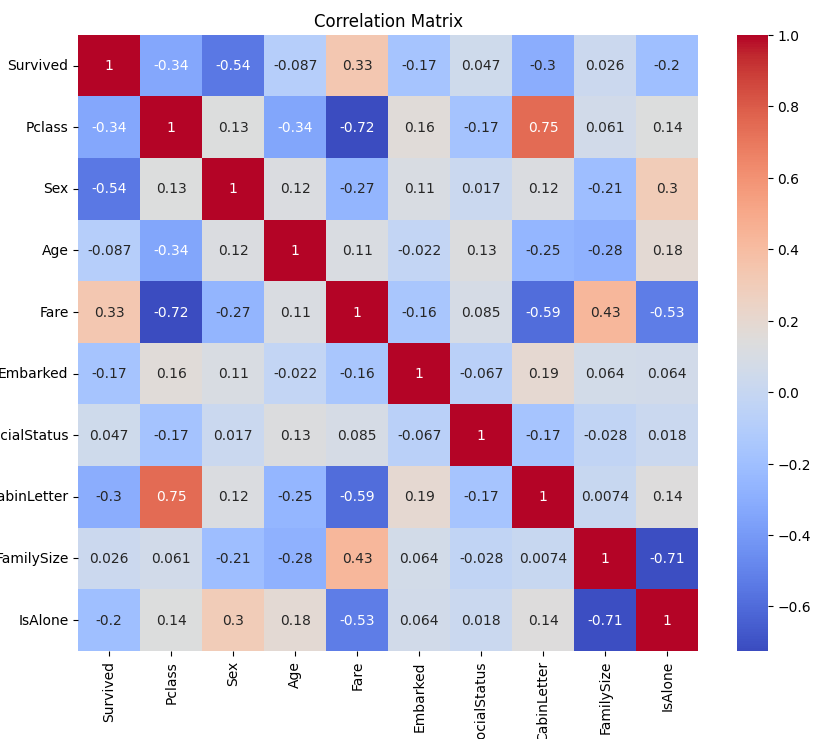

Features with a correlation greater than 0.1 (compared with the target feature) should be more important than others. The obtained features were the next:

'Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'CabinLetter', 'IsAlone'

However, I preferred to use the recursive feature elimination to get a better metric to rank the features. I applied this algorithm with these parameters: `estimator = random_forest_classifier` and `number_of_features = 7` and the selected features are the next:

'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'CabinLetter', 'FamilySize'


<h2>What system architecture you'd use? How we can automate stuff? Which cloud services you'd use? Why?</h2>

<h3>Tracking experiments</h3>

In order to have an automatic process I would start with integrate the tracking experiment process with a tool like ML-Flow. I used it to track and compare the algorithms as you can see in the next image:

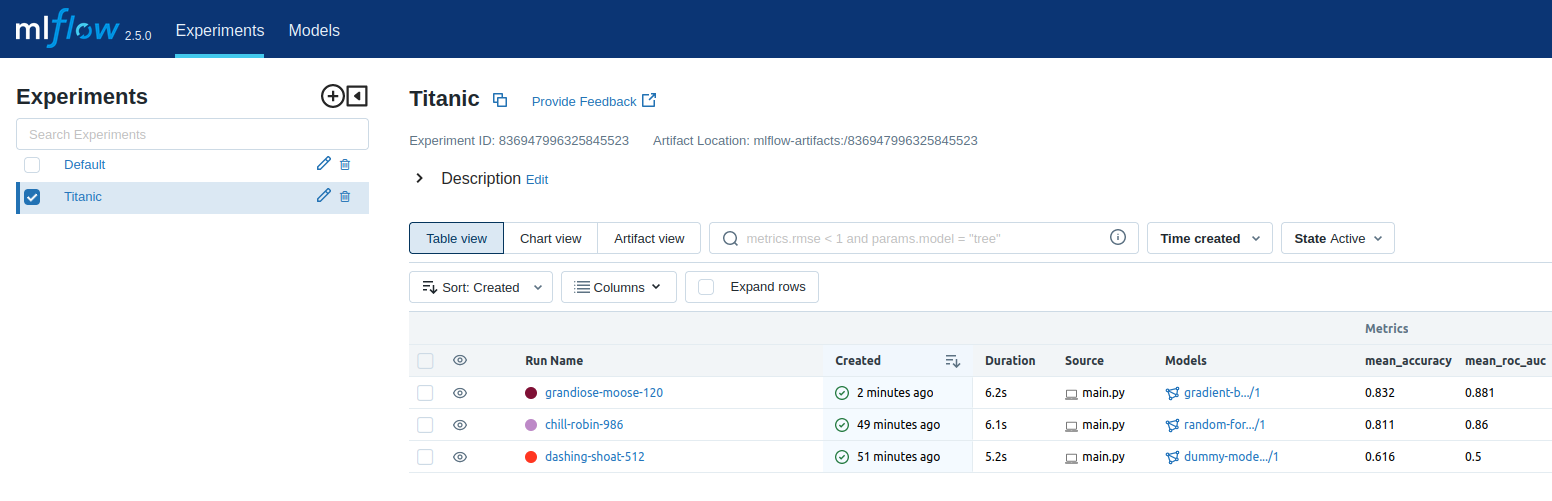

Using airflow you can track the models and send the proper model to staging or production as the case (see image)

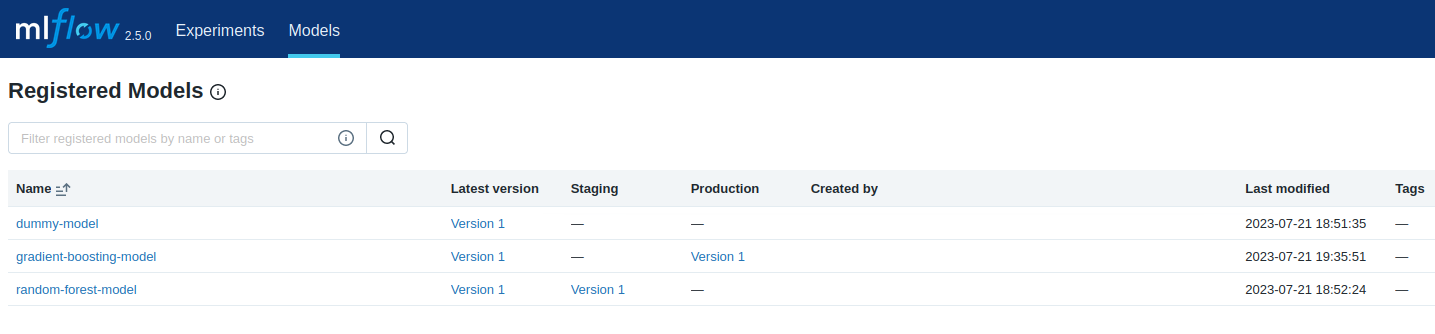

Additionally, you can share models with other colleagues and create artifacts automatically.

<h3>CI/CD</h3>

To automate the CI/CD process I would use Terraform. With this tool, you can create pipelines to send the code to test, staging, or production environments.
Additionally, I would use this tool to control the code quality standards and to prevent errors by maintaining a test coverage of over 70% (as the minimum ideally 80%)

<h3>Flow</h3>

In order to control the flow during the key ML moments I would use **Kubernetes** in combination with **Airflow**. I would create a DAG to control the daily or weekly training jobs (k8s pods) and control the quality of the model. For example, a model will be used only if the mean au roc metric is higher than 0.9  
Finally, I would use FastAPI to serve the ML model 
